In [17]:
import numpy as np  
import cvxpy as cp

data = np.array([
    [5, 6, 5, 3, 7],  # A
    [2, 2, 6, 7, 9],  # B
    [15, 7, 2, 2, 0], # C
    [4, 3, 8, 6, 5],  # D
    [0, 8, 5, 8, 5]   # E
])



for candidate in range(0, 5):
    s = cp.Variable(5)
    objective = cp.Maximize(data[candidate, :] @ s)
    constraints = [
        s[0] == 1,
        s[1] <= s[0],
        s[2] <= s[1],
        s[3] <= s[2],
        s[4] <= s[3],
        s[4] == 0,
        data[candidate, :] @ s >= data[0,: ] @ s,
        data[candidate, :] @ s >= data[1,: ] @ s,
        data[candidate, :] @ s >= data[2,: ] @ s,
        data[candidate, :] @ s >= data[3,: ] @ s,
        data[candidate, :] @ s >= data[4,: ] @ s,
    ]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    print(f"candidate {candidate} solution: {s.value}")
print("Only candidate C can win!")
    

candidate 0 solution: None
candidate 1 solution: None
candidate 2 solution: [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.39188984e-15]
candidate 3 solution: None
candidate 4 solution: None
Only candidate C can win!


In [18]:
import numpy as np  
import cvxpy as cp
import sys

largest_float = sys.float_info.max
data = np.array([
    [5, 6, 5, 3, 7],  # A
    [2, 2, 6, 7, 9],  # B
    [15, 7, 2, 2, 0], # C
    [4, 3, 8, 6, 5],  # D
    [0, 8, 5, 8, 5]   # E
])
for candidate in range(0, 5):
    s = cp.Variable(5)
    objective = cp.Maximize(data[candidate, :] @ s)
    constraints = [
        # s[0] == 1,
        s[0] <= largest_float,
        s[1] <= s[0],
        s[2] <= s[1],
        s[3] <= s[2],
        s[4] <= s[3],
        s[4] >= -largest_float,
        # s[4] == 0,
        data[candidate, :] @ s >= data[0,: ] @ s,
        data[candidate, :] @ s >= data[1,: ] @ s,
        data[candidate, :] @ s >= data[2,: ] @ s,
        data[candidate, :] @ s >= data[3,: ] @ s,
        data[candidate, :] @ s >= data[4,: ] @ s,
        data[candidate, :] @ s <= largest_float
    ]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    print(f"candidate {candidate} solution: {s.value}")
print(f"The program finds no solution for any candidate, because the constraints are not feasible.")

candidate 0 solution: None
candidate 1 solution: None
candidate 2 solution: None
candidate 3 solution: None
candidate 4 solution: None
The program finds no solution for any candidate, because the constraints are not feasible.



Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

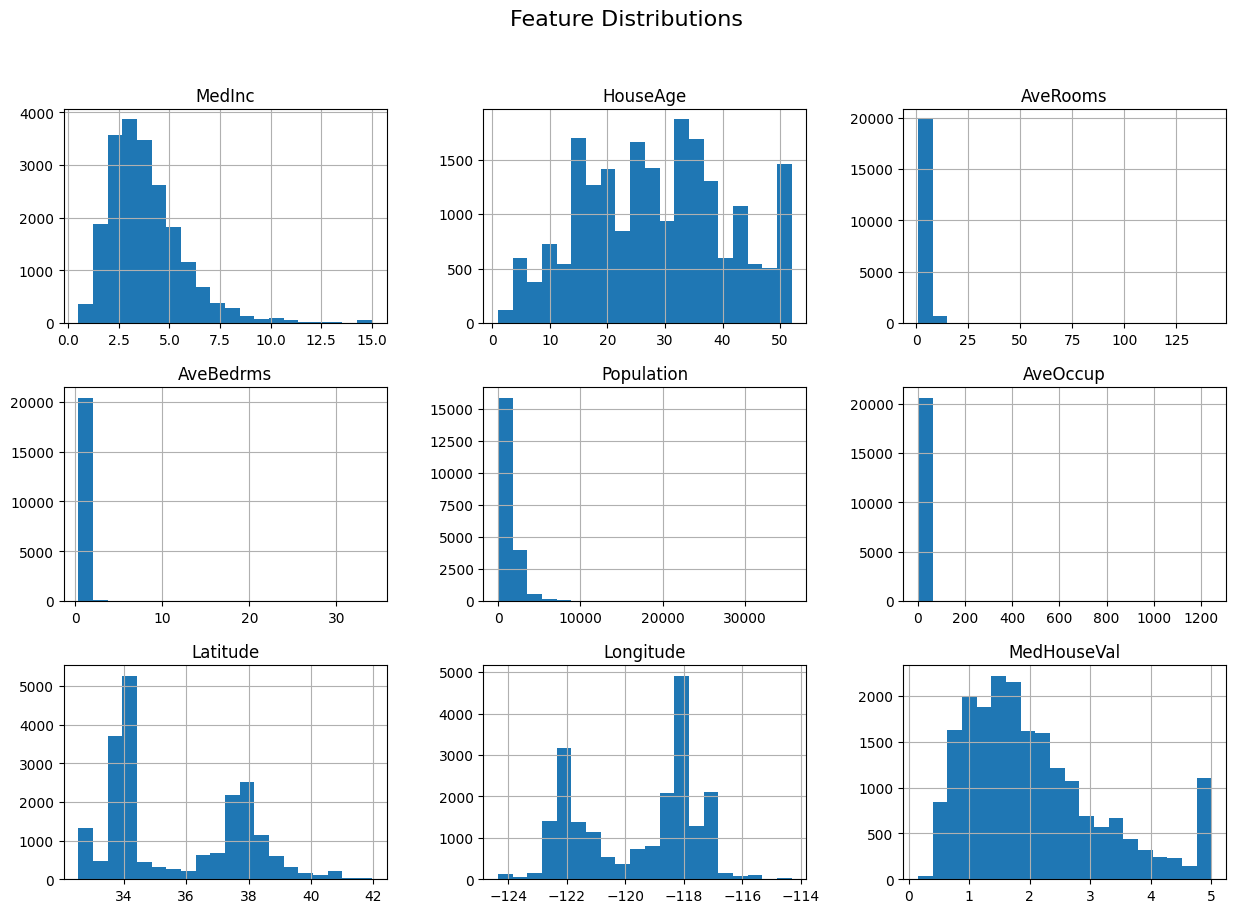

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Plot distributions of each feature
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [24]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 49.9 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
